## First I load the 2021 data (json format)
    * I need to plot the phase as func of freq to make sure the data looks like the generated data.

## Second part, I load the 2022 data

In [40]:
import json
import os
import numpy as np

def load_json(path):
    data_dir = {}
    # first load all data
    for root, dirs, files in os.walk(path):
        if 'ClosedLoopResponse_Environment.json' not in files:
            continue
        file = os.path.join(root, 'ClosedLoopResponse_Environment.json')
        print('Reading data from: ', file)
        with open(file) as jsonfile:
            try:
                data = json.load(jsonfile)
                beam_line = file.split('/')[-2]
                data_dir[beam_line] = {
                    'y': np.array(data['environment']['prm']['fit_prm']['TF']['H'], dtype=complex),
                    'x': np.array(data['environment']['prm']['fit_prm']['TF']['freq'], dtype=float)
                }
            except json.JSONDecodeError as e:
                print(f'[ERROR] File {file}, produced error: {e}')
    return data_dir

In [41]:
data_dir = load_json('/home/kiliakis/work/data-llrf/2021')

Reading data from:  /home/kiliakis/work/data-llrf/2021/3B2/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/5B0/ClosedLoopResponse_Environment.json
[ERROR] File /home/kiliakis/work/data-llrf/2021/5B0/ClosedLoopResponse_Environment.json, produced error: Expecting value: line 1 column 1 (char 0)
Reading data from:  /home/kiliakis/work/data-llrf/2021/4B1/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/1B1/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/5B2/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/3B1/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/8B2/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/2B2/ClosedLoopResponse_Environment.json
Reading data from:  /home/kiliakis/work/data-llrf/2021/8B1/ClosedLoopResponse_Environment.jso

In [42]:
print(data_dir)

{'3B2': {'y': array([ 8.13357973e-02+5.01146998e-03j,  5.14748404e-02-1.68999115e-01j,
        1.96460867e-01+1.61456905e-03j,  1.02472949e-01+4.16671775e-02j,
       -9.75813318e-02+9.63095907e-02j,  9.77197061e-02-1.87909417e-01j,
        7.39045246e-02-4.64945398e-02j,  2.83747353e-01+2.90280627e-02j,
        2.60155375e-01-9.33903833e-01j,  3.22168997e-01-6.97598921e-01j,
        2.45126062e-01-1.15028728e-01j,  9.84902655e-02+7.11448230e-03j,
        9.90647183e-02-4.47988740e-03j,  1.15920249e-01+3.72821360e-02j,
        4.55206915e-02+1.34171396e-02j, -5.95724342e-04+2.25821099e-02j,
       -2.87713287e-03-1.76026750e-02j,  9.48515496e-02-9.29110160e-02j,
        1.04208055e-01-2.73852813e-02j,  5.84438682e-02-7.59543229e-02j,
        6.74547227e-02-7.15810659e-02j,  2.35168599e-01-1.07473459e-01j,
        6.01301054e-02-9.34386117e-02j,  5.71916465e-02-4.32826869e-02j,
        8.91595953e-02+2.07697988e-02j,  1.36501522e-02+6.93244696e-02j,
        9.70976812e-02+1.26385207e-03

In [43]:
# convert to dB
for k, v in data_dir.items():
    data_dir[k]['y'] = 20 * np.log10(np.abs(v['y']))

In [72]:
import pandas as pd
df = pd.DataFrame.from_dict(data_dir, orient='index')
df.head()

,y,x
3B2,"[-21.777909296765575, -15.057012209125634, -14...","[-1619443.359375, -1614550.78125, -1609658.203..."
4B1,"[-16.549652269096566, -20.01969655997585, -20....","[-1619443.359375, -1614550.78125, -1609658.203..."
1B1,"[-20.2673641620488, -19.779742221907256, -18.4...","[-1619443.359375, -1614550.78125, -1609658.203..."
5B2,"[-13.816465626241573, -19.706971066659623, -25...","[-1619443.359375, -1614550.78125, -1609658.203..."
3B1,"[-14.487696517960305, -27.50301068354199, -27....","[-1619443.359375, -1614550.78125, -1609658.203..."


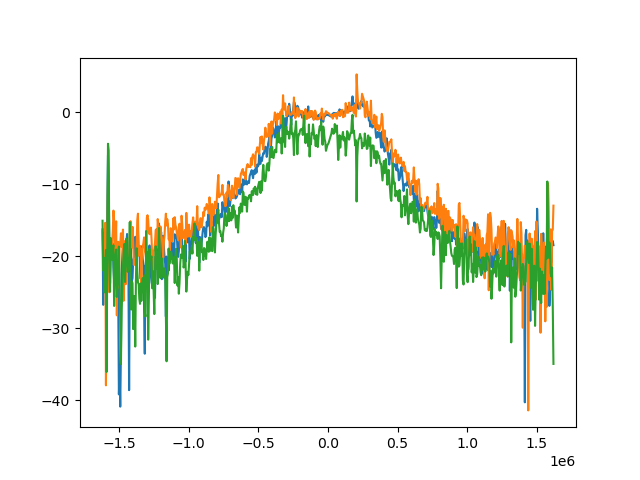

In [73]:
%matplotlib widget
from matplotlib import pyplot as plt

# visualize the data
for index, row in df.sample(n=3).iterrows():
    y = row['y']
    x = row['x']
    plt.plot(x, y)
plt.show()

In [74]:
# save dataframe to file
df.to_pickle('./data/tf-measurement-2021.pkl')

In [70]:
# freq seems to be a bit off
freqs = np.zeros((len(df), len(df.x[0])), dtype=np.float32)
index = 0
for _, row in df.iterrows():
    freqs[index, :] = row.values[1]
    index+=1
# assert all freqs are equal
np.unique(np.diff(freqs), axis=1)
x = df.iloc[0].x.astype(np.float32)
df = df.drop(columns='x')

In [71]:
df.head()

,y
3B2,"[-21.777909296765575, -15.057012209125634, -14..."
4B1,"[-16.549652269096566, -20.01969655997585, -20...."
1B1,"[-20.2673641620488, -19.779742221907256, -18.4..."
5B2,"[-13.816465626241573, -19.706971066659623, -25..."
3B1,"[-14.487696517960305, -27.50301068354199, -27...."


In [84]:
import os
import numpy as np

def load_npz(path):
    data_dir = {}
    # first load all data
    for root, dirs, files in os.walk(path):
        for file in files:
            if 'closed_loop_response__transfer_function__' not in file:
                continue

            file = os.path.join(root, file)
            print('Reading data from: ', file)
            try:
                beam_line = file.split('/')[-2]
                timestamp = file.split('_function__')[1].split('.npz')[0]
                data = np.load(file)

                data_dir[beam_line+'_'+timestamp] = {
                    'y': np.array(data['h'], dtype=complex),
                    'x': np.array(data['freq'], dtype=float)
                }
            except Exception as e:
                print(f'[ERROR] File {file}, produced error: {e}')

    return data_dir

In [104]:
data_dir_2022 = load_npz('/home/kiliakis/work/data-llrf/2022')
# convert to dB
for k, v in data_dir_2022.items():
    data_dir_2022[k]['y'] = 20 * np.log10(np.abs(v['y']))

Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_173447.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_173834.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_171151.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_174043.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_171806.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_174519.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/acquisition_data/3B2/closed_loop_response__transfer_function__220412_173322.npz
Reading data from:  /home/kiliakis/work/data-llrf/2022/

In [106]:
import pandas as pd
df22 = pd.DataFrame.from_dict(data_dir_2022, orient='index')
df22.head()

,y,x
3B2_220412_173447,"[-24.51491888231732, -18.586843008533414, -19....","[-1619443.359375, -1614550.78125, -1609658.203..."
3B2_220412_173834,"[-16.983423382785222, -20.326042606836452, -22...","[-1619443.359375, -1614550.78125, -1609658.203..."
3B2_220412_171151,"[-23.129462016787343, -14.875370553975397, -19...","[-1619443.359375, -1614550.78125, -1609658.203..."
3B2_220412_174043,"[-16.101513872082162, -20.602523606631745, -14...","[-1619443.359375, -1614550.78125, -1609658.203..."
3B2_220412_171806,"[-18.955587103610682, -24.970713252863305, -23...","[-1619443.359375, -1614550.78125, -1609658.203..."


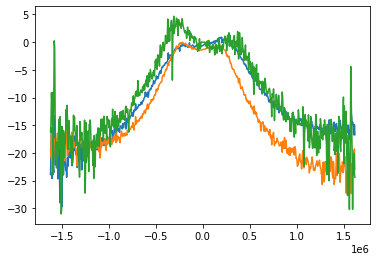

In [107]:
%matplotlib inline

from matplotlib import pyplot as plt

for index, row in df22.sample(n=3).iterrows():
    y = row['y']
    x = row['x']
    # label = f'm{m}-s{s}'
    plt.plot(x, y)
plt.show()

In [108]:
# save dataframe to file
df22.to_pickle('./data/tf-measurement-2022.pkl')

In [98]:
# freq seems to be a bit off
freqs = np.zeros((len(df22), len(df22.x[0])), dtype=np.float32)
index = 0
for _, row in df22.iterrows():
    freqs[index, :] = row.values[1]
    index+=1
# assert all freqs are equal
print(np.unique(np.diff(freqs), axis=1))
x = df22.iloc[0].x.astype(np.float32)

df22 = df22.drop(columns='x')

[[4892.5    4892.5625 4892.578  4892.5938 4892.625  9785.156 ]
 [4892.5    4892.5625 4892.578  4892.5938 4892.625  9785.156 ]
 [4892.5    4892.5625 4892.578  4892.5938 4892.625  9785.156 ]
 ...
 [4892.5    4892.5625 4892.578  4892.5938 4892.625  9785.156 ]
 [4892.5    4892.5625 4892.578  4892.5938 4892.625  9785.156 ]
 [4892.5    4892.5625 4892.578  4892.5938 4892.625  9785.156 ]]


In [109]:
print(df22.shape)

(452, 2)
